In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Visualización III- 25/07

1. Usando la librería seaborn, cread una gráfica que nos muestre el número de personas que han hecho una solicitud de ticket en cada año. Hacedlo solo para los del tipo "Problema".

In [2]:
df = pd.read_csv("../Pandas/data/relacion_años_pair5.csv")
df.drop('Unnamed: 0',axis=1,inplace=True)
df['fecha'] = pd.to_datetime(df['fecha'])
df['semestre'] = np.where(df['fecha'].dt.month <= 6, '1º semestre', '2º semestre')
df.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,año,semestre
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,2º semestre
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,1º semestre
2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016,1º semestre
3,GDDTSR-5942488006,2016-04-28,320.0,40.0,Sistema,Solicitud,0 - Sin Clasificar,0 - Sin Asignar,9.0,5.0,2016,1º semestre
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016,1º semestre


In [3]:
df_problema= df[df["tipo"] == "Problema"]
df_problema.head()

,id_ticket,fecha,id_empleado,id_agente,categoría,tipo,severidad,prioridad,días_resolución,satisfacción,año,semestre
0,GDDENR-5042564453,2016-07-13,1735.0,4.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,2º semestre
1,GDDENR-8042508060,2016-05-18,1566.0,10.0,Acceso&%Login,Problema,0 - Sin Clasificar,0 - Sin Asignar,0.0,5.0,2016,1º semestre
2,GDDESR-1342539995,2016-06-18,569.0,29.0,Sistema,Problema,0 - Sin Clasificar,0 - Sin Asignar,3.0,5.0,2016,1º semestre
4,GDLEER-0042524120,2016-06-03,1842.0,31.0,Software,Problema,2 - Normal,0 - Sin Asignar,0.0,5.0,2016,1º semestre
5,GDLEER-0142608095,2016-08-26,59.0,20.0,Software,Problema,2 - Normal,0 - Sin Asignar,1.0,1.0,2016,2º semestre


In [4]:
df2 = pd.read_csv('../Pandas/data/relacion_empleados_puestos_pair5.csv')
df2.drop(['Unnamed: 0','unnamed:_0_x','unnamed:_0_y'],axis=1,inplace=True)
df2.head()

,turno,id_empleado,apellido,nombre,id_puesto,email,puesto,departamento,tipo_puesto
0,A,6,VILLA,JESUS,50-32200,jesus.villa@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
1,NaN,60,DIAZ,PATRICIA,50-32200,patricia.diaz@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
2,B,2,DUARTE,ANTONIO,50-32200,antonio.duarte@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
3,NaN,24,VILLANUEVA,JESUS,50-32200,jesus.villanueva@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo
4,NaN,98,GALLEGOS,PATRICIA,50-32200,patricia.gallegos@tractchun.com,Comprador de Materiales,CONTROL DE PRODUCCION,Administrativo


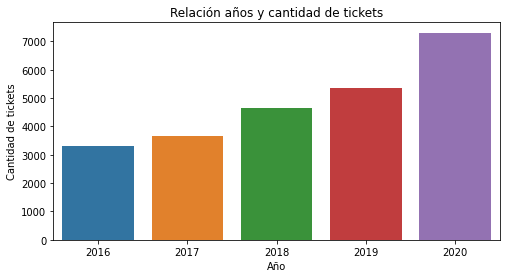

In [5]:
plt.figure(figsize =(8,4))

fig = sns.countplot(x='año' , data=df_problema)

fig.set(xlabel='Año', ylabel='Cantidad de tickets')

fig.set_title('Relación años y cantidad de tickets')
plt.show()

2. La gráfica anterior nos ha mostrado una tendencia ascendente en el número de solicitudes a lo largo de los años, lo que preocupa a la empresa, por lo que quieren seguir analizando los datos para ver si son capaces de identificar los problemas subyacentes a estas solicitudes. Para esto, quieren saber si hay diferencias a lo largo del año. En concreto nos piden que hagamos un subplot con seaborn donde:
    * En la primera gráfica tengamos la gráfica que creamos en el ejercicio anterior
    * En la segunda gráfica tengamos la comparación por años y semestres para el número de tikects de tipo "Problema".

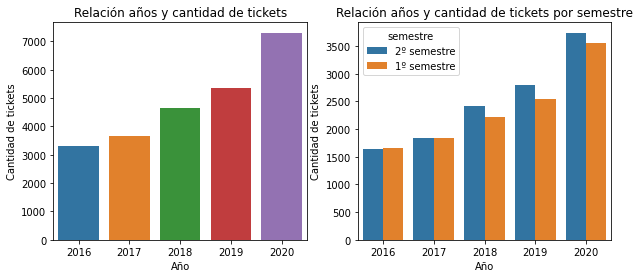

In [6]:
fig,ax = plt.subplots(1,2,figsize =(10,4))

sns.countplot(x='año' , data=df_problema,ax=ax[0])

ax[0].set(xlabel='Año', ylabel='Cantidad de tickets')
ax[0].set_title('Relación años y cantidad de tickets')

sns.countplot(x='año' , data=df_problema,hue='semestre',ax=ax[1])

ax[1].set(xlabel='Año', ylabel='Cantidad de tickets')
ax[1].set_title('Relación años y cantidad de tickets por semestre');

3. La empresa se siente algo aliviada al ver que no hay diferencias entre semestres, pero seguimos sin identificar porque cada año tenemos más solicitudes. Nuestras jefas quieren saber ahora, que prioridad tienen los tickets que tenemos en el conjunto de datos. Por eso nos piden que volvamos a hacer un subplot:
    * En la primera gráfica deberíamos tener la gráfica creada en el ejercicio 1
    * En la segunda gráfica deberíamos incluir el número de tickets por año en función de la prioridad que tienen.

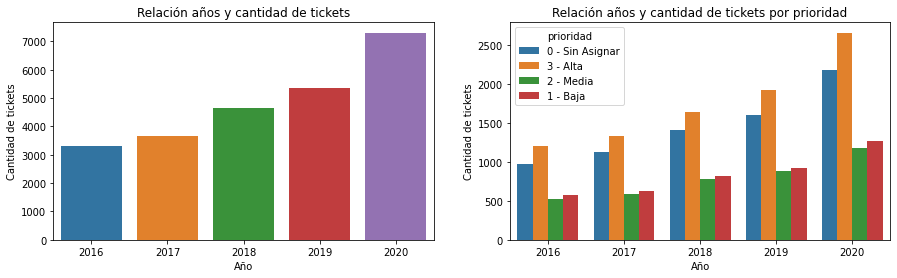

In [7]:
fig,ax = plt.subplots(1,2,figsize =(15,4))

sns.countplot(x='año' , data=df_problema,ax=ax[0])

ax[0].set(xlabel='Año', ylabel='Cantidad de tickets')
ax[0].set_title('Relación años y cantidad de tickets')

sns.countplot(x='año' , data=df_problema,hue='prioridad',ax=ax[1])

ax[1].set(xlabel='Año', ylabel='Cantidad de tickets')
ax[1].set_title('Relación años y cantidad de tickets por prioridad');

4. Hasta ahora hemos estado viendo que no parece que haya nada alarmante. Por lo que ahora quieren que evaluemos la cantidad de trabajo que cada empleado esta haciendo, para poder identificar rápidamente un problema en la distribución de tareas y tomar medidas para solucionarlo. Para ello nos piden que hagamos dos gráficas en un subplot:
* La primera gráfica tiene que tener los 5 empleados con mayor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.
* La primera gráfica tiene que tener los 5 empleados con menor número de tickets, deberemos mostrar quienes son y cuál es total de tickets que atienden cada uno.

📌 NOTA Somos analistas y no nos vale con sacar las gráficas. Incluid una celda de markdown donde expliqueis que es lo que estamos viendo en las gráficas, es decir, haced una interpretación de los resultados.

In [8]:
df_empleados = df.groupby("id_empleado")['id_ticket'].count().sort_values(ascending = False).reset_index()
df_empleados['id_empleado'] = df_empleados['id_empleado'].astype(int)
union = df_empleados.merge(df2,on='id_empleado')
df_empleados_mayor = union.head()
df_empleados_mayor['nombre_completo'] = df_empleados_mayor['nombre'] + ' ' + df_empleados_mayor['apellido']
df_empleados_mayor

/var/folders/cf/7kf7s8j17wn53znl0ywm912w0000gp/T/ipykernel_4401/2815062566.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empleados_mayor['nombre_completo'] = df_empleados_mayor['nombre'] + ' ' + df_empleados_mayor['apellido']


,id_empleado,id_ticket,turno,apellido,nombre,id_puesto,email,puesto,departamento,tipo_puesto,nombre_completo
0,285,73,NaN,MARTINEZ,DIOS,80-22205,dios.martinez@tractchun.com,Coordinador de Activos,MANTENIMIENTO,Mandos Medios,DIOS MARTINEZ
1,754,73,NaN,MARTINEZ,GERARDO,55-23200,gerardo.martinez@tractchun.com,Ingeniero de Manufactura,INGENIERIA DE MANUFACTURA,Operativo,GERARDO MARTINEZ
2,636,71,NaN,BORQUEZ,MARTHA,45-11000,martha.borquez@tractchun.com,Supervisor de Aseguramiento de Calidad,INGENIERIA DE CALIDAD,Mandos Medios,MARTHA BORQUEZ
3,1341,70,NaN,CHOMINA,ALFONSO,20-31410,alfonso.chomina@tractchun.com,Clerk de Tráfico,"SISTEMAS, TRAFICO Y ADUANAS",Administrativo,ALFONSO CHOMINA
4,79,69,NaN,Arango,Marlen,80-23200,marlen.arango@tractchun.com,Ingeniero de Manufactura,MANTENIMIENTO,Operativo,Marlen Arango


In [9]:
df_empleados_menor = union.tail()
df_empleados_menor['nombre_completo'] = df_empleados_menor['nombre'] + ' ' + df_empleados_menor['apellido']
df_empleados_menor

/var/folders/cf/7kf7s8j17wn53znl0ywm912w0000gp/T/ipykernel_4401/2868626029.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_empleados_menor['nombre_completo'] = df_empleados_menor['nombre'] + ' ' + df_empleados_menor['apellido']


,id_empleado,id_ticket,turno,apellido,nombre,id_puesto,email,puesto,departamento,tipo_puesto,nombre_completo
1995,72,31,NaN,PALAFOX,ALFREDO,50-33110,alfredo.palafox@tractchun.com,Controlador de producción,CONTROL DE PRODUCCION,Mandos Medios,ALFREDO PALAFOX
1996,1618,31,NaN,VALLES,JESUS,30-13300,jesus.valles@tractchun.com,Ingeniero de Calibracion y Metrologia,"AUDITORIA INTERNA, CALIBRACION Y METROLOGIA",Operativo,JESUS VALLES
1997,1195,29,NaN,Lennis,Maria,70-21100,maria.lennis@tractchun.com,Supervisor de Recursos Humanos,Recursos Humanos,Mandos Medios,Maria Lennis
1998,99,27,NaN,GARCIA,DIANA,15-24100,diana.garcia@tractchun.com,Supervisor de Producción,PRODUCCION,Mandos Medios,DIANA GARCIA
1999,793,26,NaN,Piedrahita,Genni,80-22210,genni.piedrahita@tractchun.com,Supervisor de Mantenimiento,MANTENIMIENTO,Mandos Medios,Genni Piedrahita


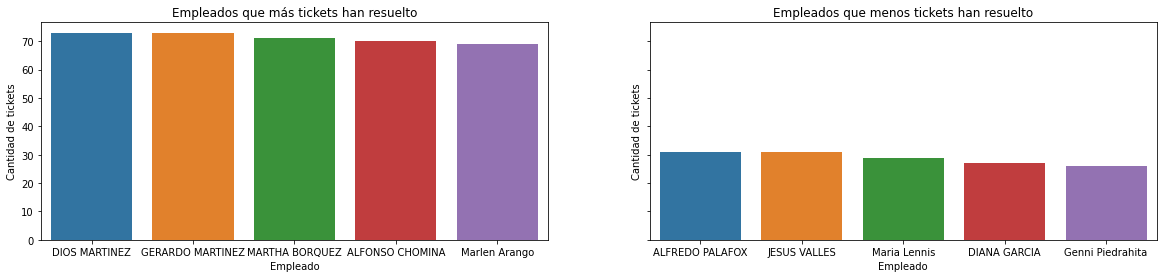

In [10]:
fig,ax = plt.subplots(1,2,figsize =(20,4),sharey=True)

sns.barplot(x='nombre_completo' , y='id_ticket', data=df_empleados_mayor,ax=ax[0])


ax[0].set(xlabel='Empleado', ylabel='Cantidad de tickets')
ax[0].set_title('Empleados que más tickets han resuelto')

sns.barplot(x='nombre_completo' , y='id_ticket', data=df_empleados_menor,ax=ax[1])


ax[1].set(xlabel='Empleado', ylabel='Cantidad de tickets')
ax[1].set_title('Empleados que menos tickets han resuelto');